In [121]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [122]:
csv_path = "../data/inpg_dataset/csv_data/predis-mhi.csv"
feature_name = "conso_global"
window_size = 24
step = 24

## Prepreocess & Build dataset

In [123]:
df = pd.read_csv(csv_path, sep=";")
df['date_time'] = pd.to_datetime(df['date_time'], format="%m/%d/%Y %H:%M:%S")
load = df.set_index('date_time')
load

conso_global
date_time                        
2016-01-01 00:00:00      0.000000
2016-01-01 01:00:00      0.000000
2016-01-01 02:00:00      1.000000
2016-01-01 03:00:00      1.000000
2016-01-01 04:00:00      0.000000
...                           ...
2022-10-05 10:00:00      3.999793
2022-10-05 11:00:00      5.001383
2022-10-05 12:00:00      4.000128
2022-10-05 13:00:00      4.000000
2022-10-05 14:00:00      0.000000

[59271 rows x 1 columns]

In [124]:
# remove duplicate index
load = load[~load.index.duplicated()]

In [125]:
# replace missing values by the value of the previous week
idx = pd.date_range(load.index[0], load.index[-1], freq="H")
load = load.reindex(idx, fill_value=np.nan)
load = load.fillna(load.shift(24*7))

In [126]:
# remove corrupt data
# load = load[load.index >= '2017-09-01'] # there was a problem with the data before this date
# load = load[load.index < '2020-02-01']

In [ ]:
# remove august and december holidays


# remove covid period



In [127]:
# remove last uncomplete last day
load = load[load.index < f"{str(load.index[-1])[:10]} 00:00:00"]

In [128]:
# removing holidays and weekends

import holidays
from datetime import datetime, timedelta

fr_holidays = holidays.France(years=list(range(2016, 2023)))
holiday_dates = list(fr_holidays.keys())

# holiday_dates: 2016-01-01 -> 2016-01-01 00:00:00 with 1h step
sampled_dates = []
for date in holiday_dates:
    start_time = datetime(date.year, date.month, date.day, 0, 0, 0) # Start at 00:00:00
    sampled_dates.append(start_time)
    for _ in range(23):
        start_time += timedelta(hours=1)
        sampled_dates.append(start_time)

full_Holiday_date = [str(date) for date in sampled_dates]

load = load[~load.index.dayofweek.isin([5, 6]) & ~load.index.isin(list(full_Holiday_date))]
load


conso_global
2016-01-04 00:00:00      0.000000
2016-01-04 01:00:00      0.000000
2016-01-04 02:00:00      0.999178
2016-01-04 03:00:00      0.000822
2016-01-04 04:00:00      0.000000
...                           ...
2022-10-04 19:00:00      2.000000
2022-10-04 20:00:00      0.000000
2022-10-04 21:00:00      1.000000
2022-10-04 22:00:00      0.000000
2022-10-04 23:00:00      1.000000

[40944 rows x 1 columns]

396 :  2017-07-28 00:00:00 -> 2017-08-02 00:00:00


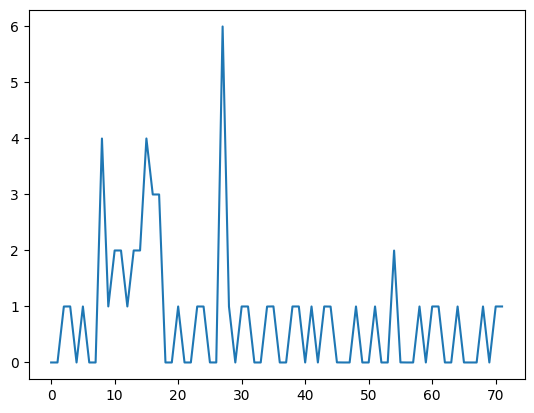

397 :  2017-07-31 00:00:00 -> 2017-08-03 00:00:00


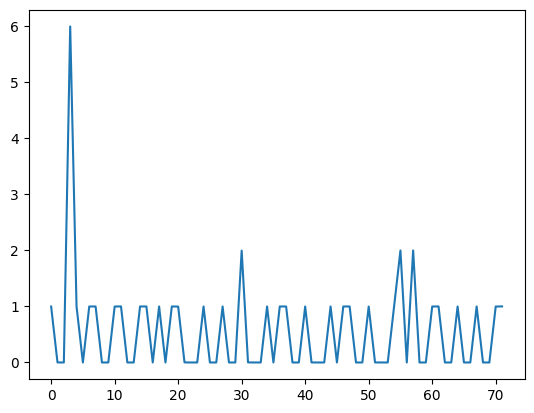

398 :  2017-08-01 00:00:00 -> 2017-08-04 00:00:00


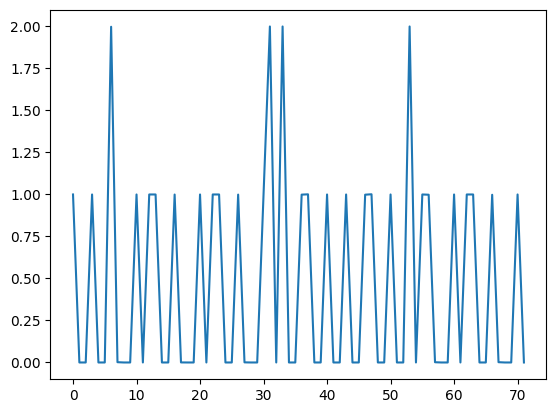

399 :  2017-08-02 00:00:00 -> 2017-08-07 00:00:00


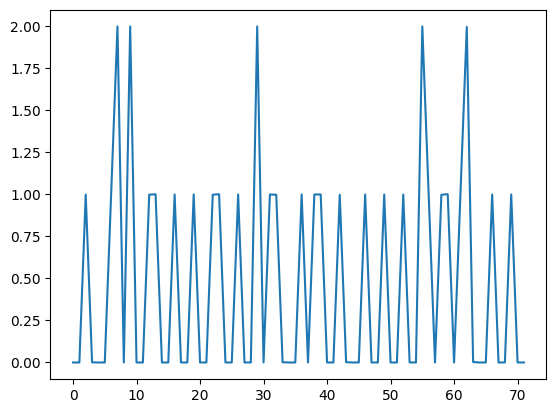

400 :  2017-08-03 00:00:00 -> 2017-08-08 00:00:00


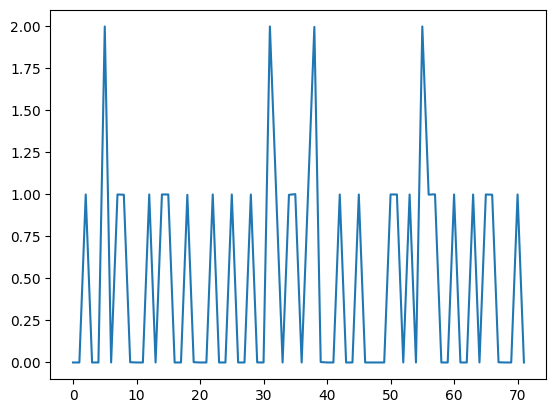

401 :  2017-08-04 00:00:00 -> 2017-08-09 00:00:00


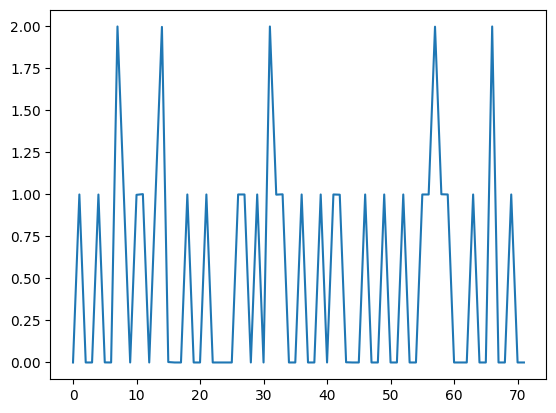

402 :  2017-08-07 00:00:00 -> 2017-08-10 00:00:00


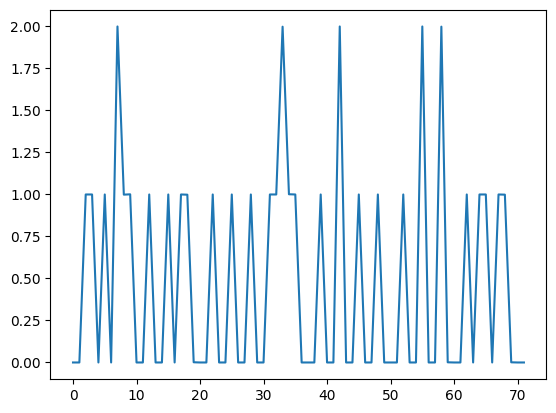

403 :  2017-08-08 00:00:00 -> 2017-08-11 00:00:00


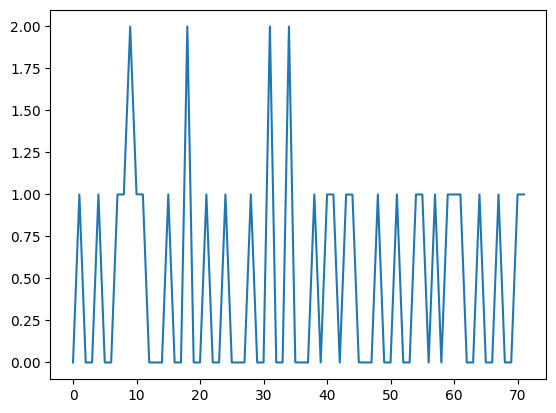

404 :  2017-08-09 00:00:00 -> 2017-08-14 00:00:00


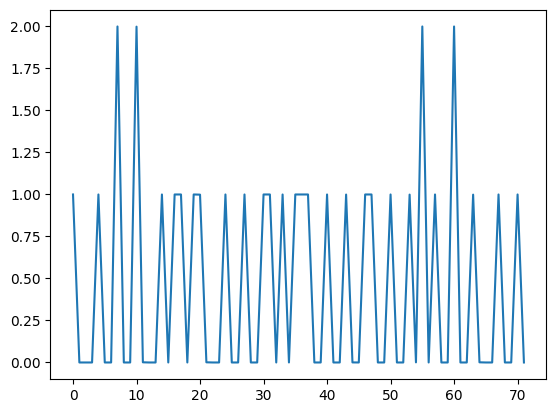

405 :  2017-08-10 00:00:00 -> 2017-08-16 00:00:00


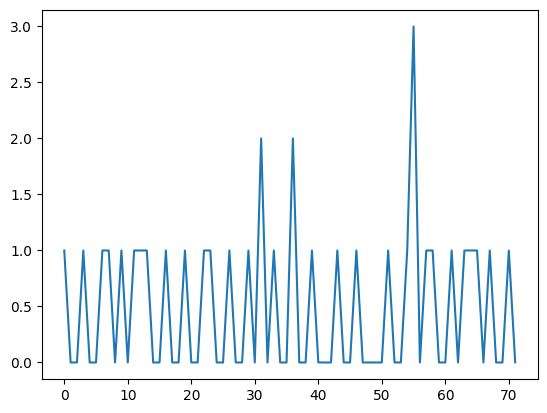

406 :  2017-08-11 00:00:00 -> 2017-08-17 00:00:00


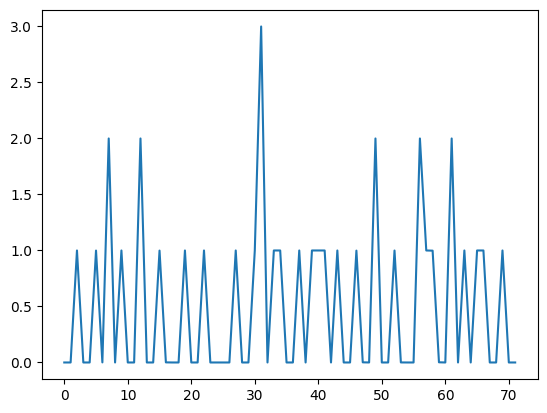

407 :  2017-08-14 00:00:00 -> 2017-08-18 00:00:00


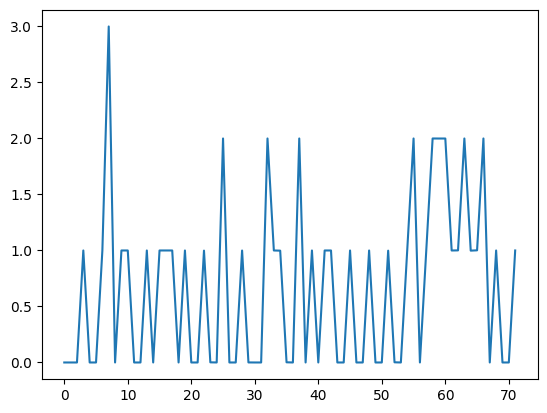

408 :  2017-08-16 00:00:00 -> 2017-08-21 00:00:00


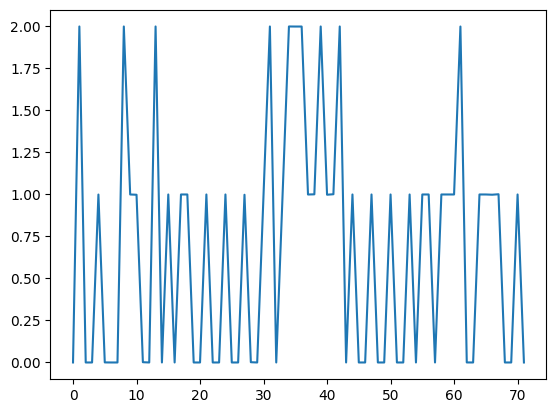

500 :  2017-12-26 00:00:00 -> 2017-12-29 00:00:00


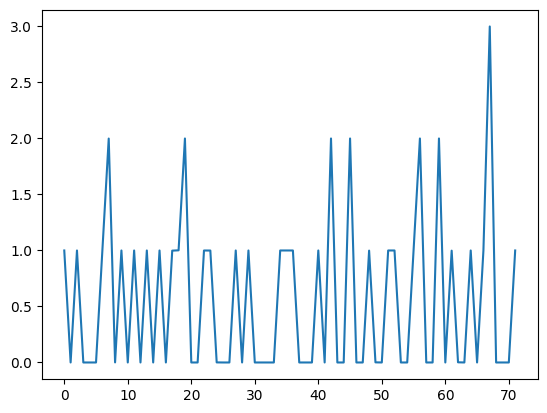

501 :  2017-12-27 00:00:00 -> 2018-01-02 00:00:00


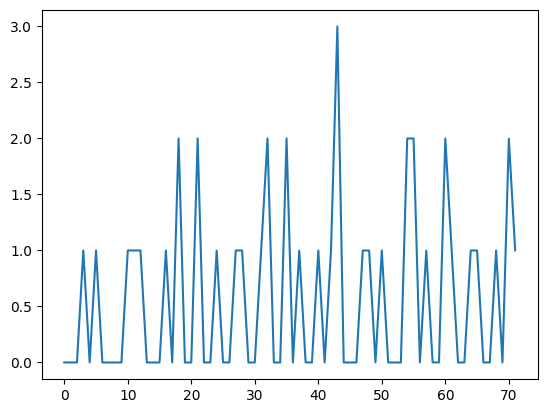

502 :  2017-12-28 00:00:00 -> 2018-01-03 00:00:00


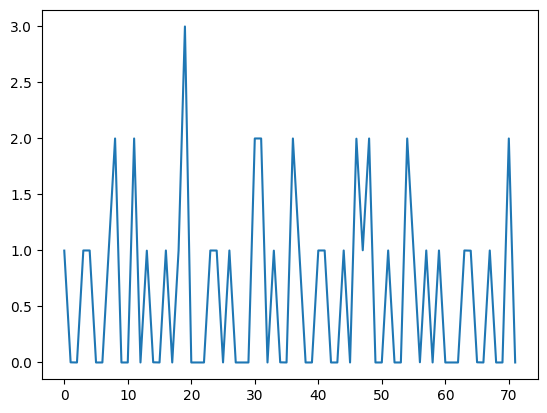

751 :  2018-12-24 00:00:00 -> 2018-12-28 00:00:00


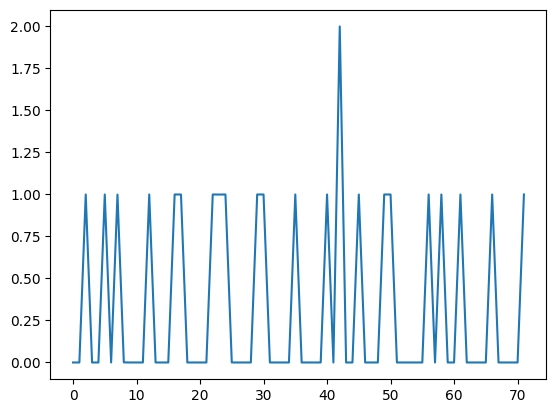

752 :  2018-12-26 00:00:00 -> 2018-12-31 00:00:00


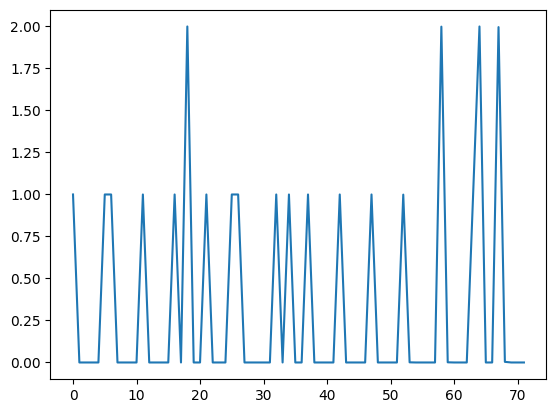

753 :  2018-12-27 00:00:00 -> 2019-01-02 00:00:00


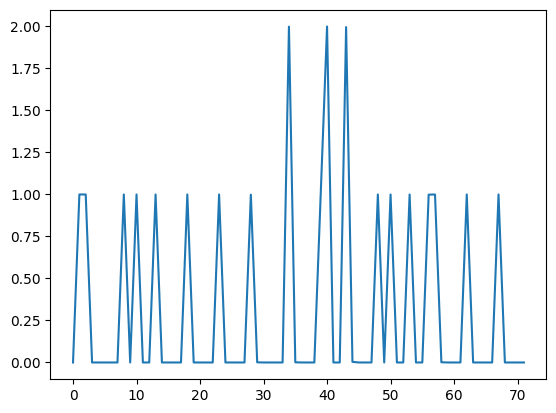

754 :  2018-12-28 00:00:00 -> 2019-01-03 00:00:00


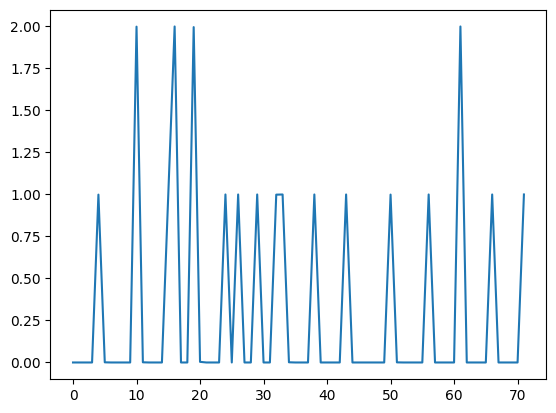

901 :  2019-07-31 00:00:00 -> 2019-08-05 00:00:00


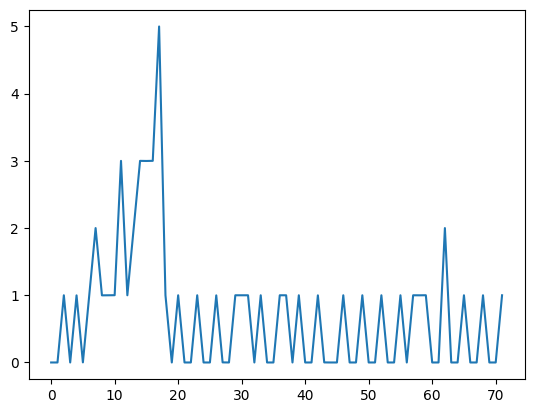

902 :  2019-08-01 00:00:00 -> 2019-08-06 00:00:00


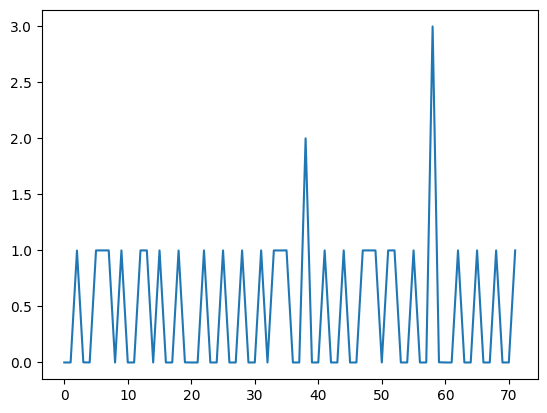

903 :  2019-08-02 00:00:00 -> 2019-08-07 00:00:00


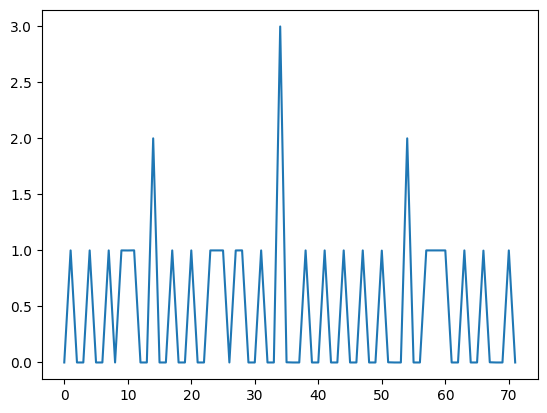

904 :  2019-08-05 00:00:00 -> 2019-08-08 00:00:00


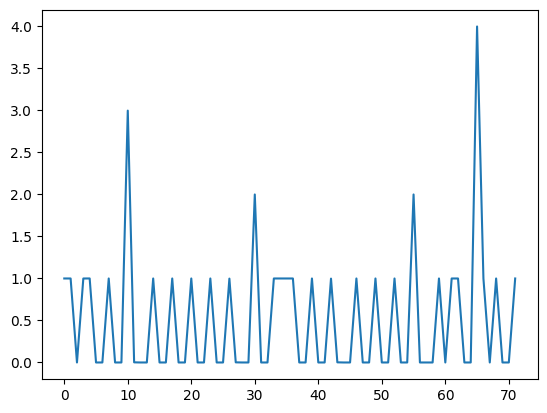

905 :  2019-08-06 00:00:00 -> 2019-08-09 00:00:00


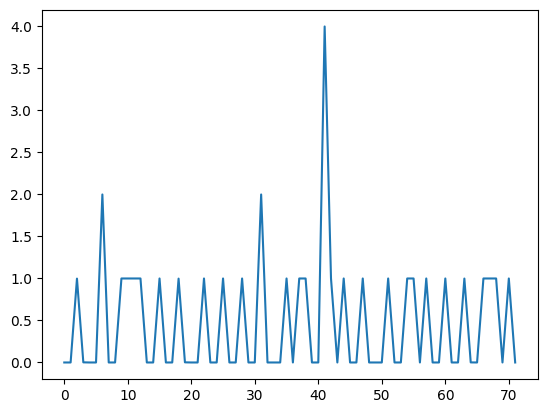

906 :  2019-08-07 00:00:00 -> 2019-08-12 00:00:00


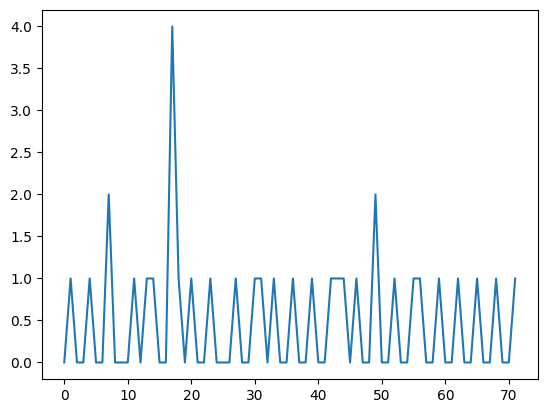

907 :  2019-08-08 00:00:00 -> 2019-08-13 00:00:00


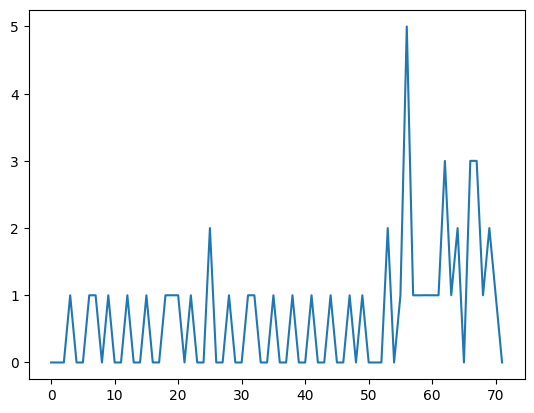

1001 :  2019-12-23 00:00:00 -> 2019-12-27 00:00:00


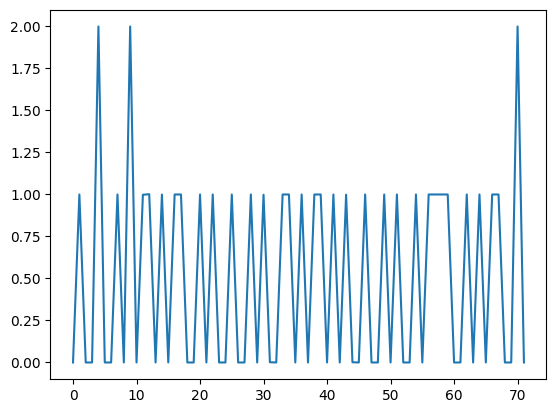

1002 :  2019-12-24 00:00:00 -> 2019-12-30 00:00:00


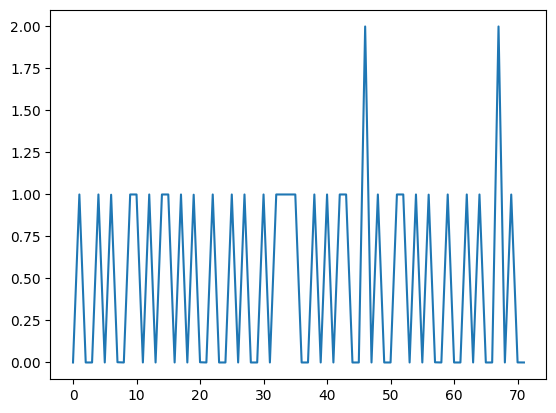

1003 :  2019-12-26 00:00:00 -> 2019-12-31 00:00:00


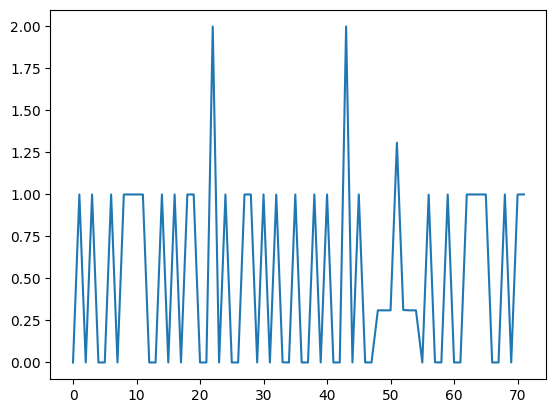

1004 :  2019-12-27 00:00:00 -> 2020-01-02 00:00:00


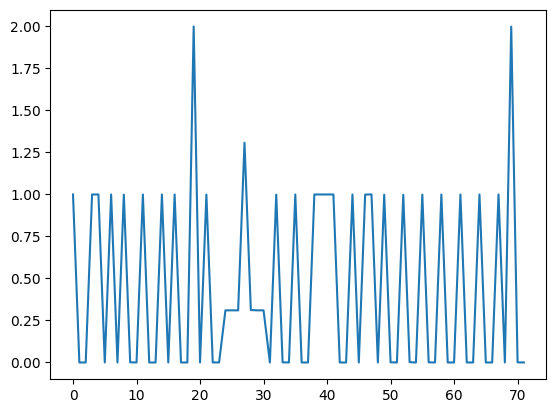

1005 :  2019-12-30 00:00:00 -> 2020-01-03 00:00:00


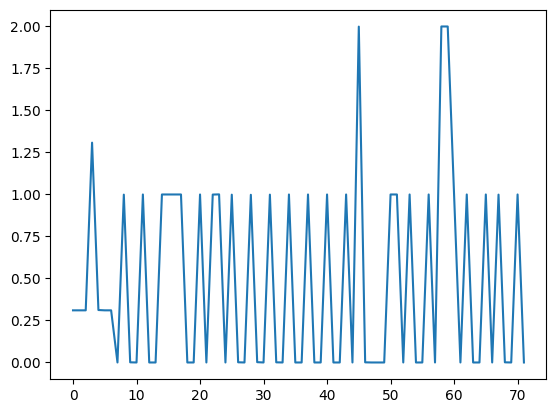

1006 :  2019-12-31 00:00:00 -> 2020-01-06 00:00:00


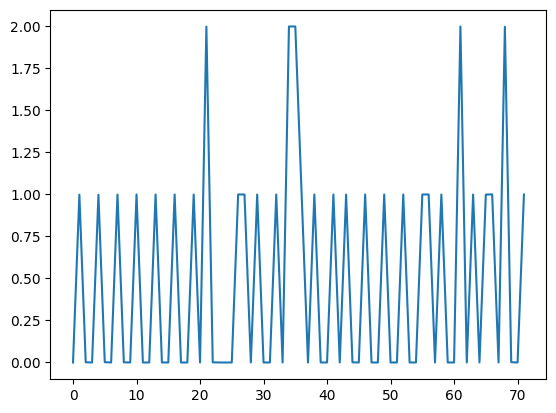

1060 :  2020-03-17 00:00:00 -> 2020-03-20 00:00:00


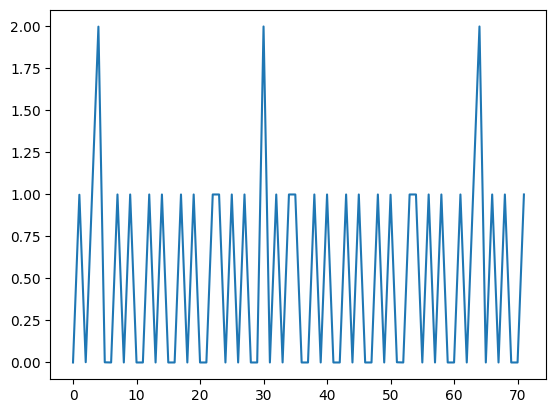

1061 :  2020-03-18 00:00:00 -> 2020-03-23 00:00:00


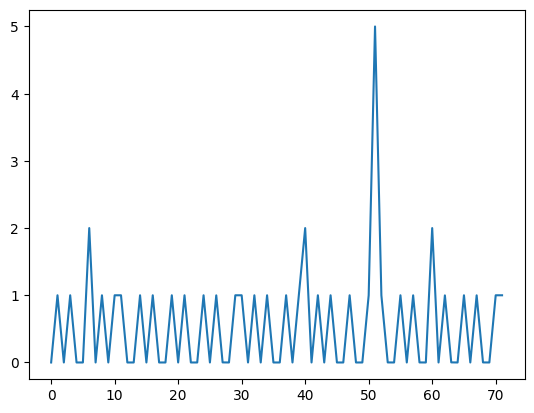

1062 :  2020-03-19 00:00:00 -> 2020-03-24 00:00:00


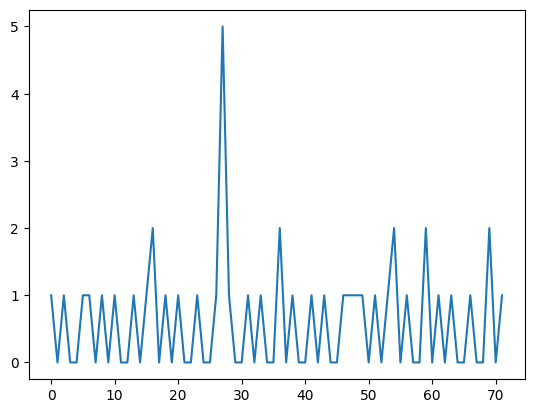

1063 :  2020-03-20 00:00:00 -> 2020-03-25 00:00:00


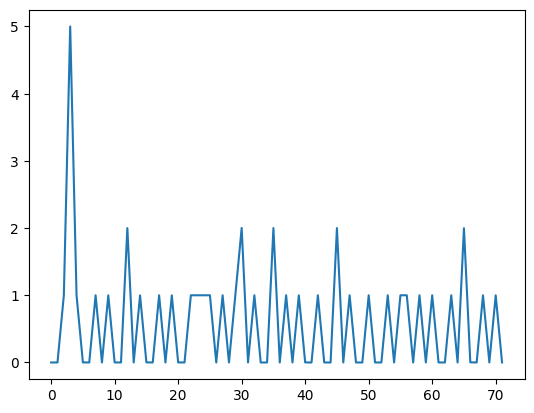

1064 :  2020-03-23 00:00:00 -> 2020-03-26 00:00:00


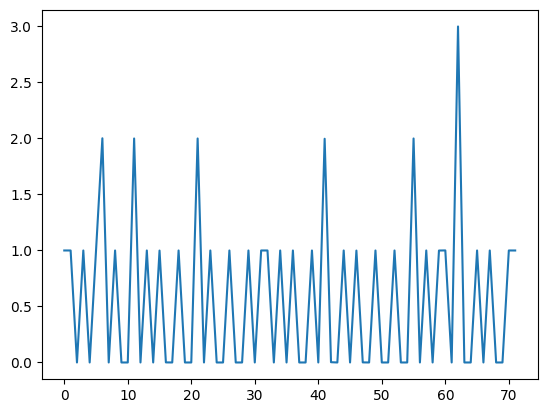

1065 :  2020-03-24 00:00:00 -> 2020-03-27 00:00:00


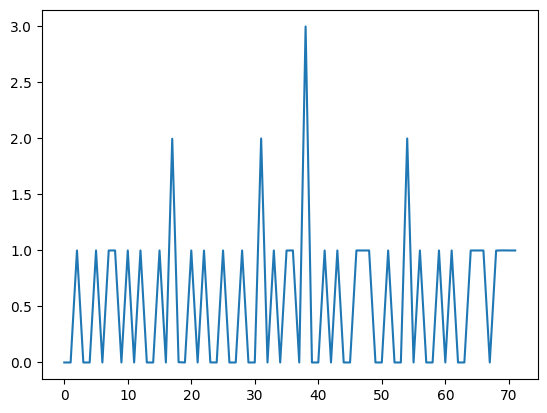

1066 :  2020-03-25 00:00:00 -> 2020-03-30 00:00:00


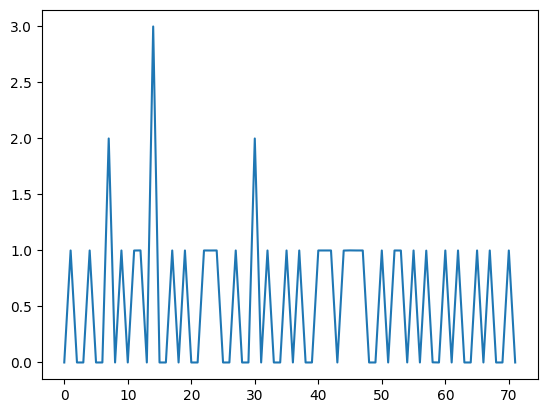

1067 :  2020-03-26 00:00:00 -> 2020-03-31 00:00:00


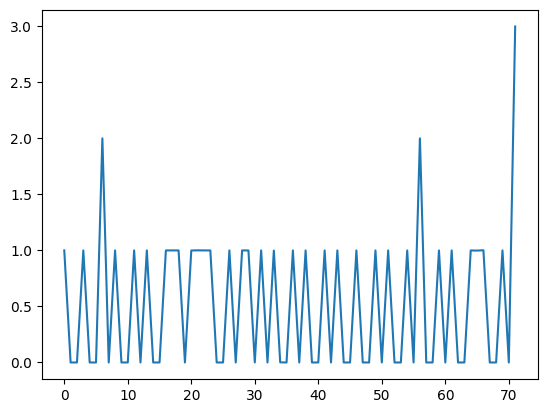

1068 :  2020-03-27 00:00:00 -> 2020-04-01 00:00:00


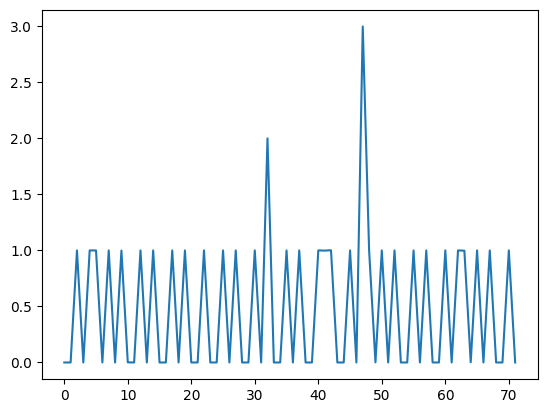

1069 :  2020-03-30 00:00:00 -> 2020-04-02 00:00:00


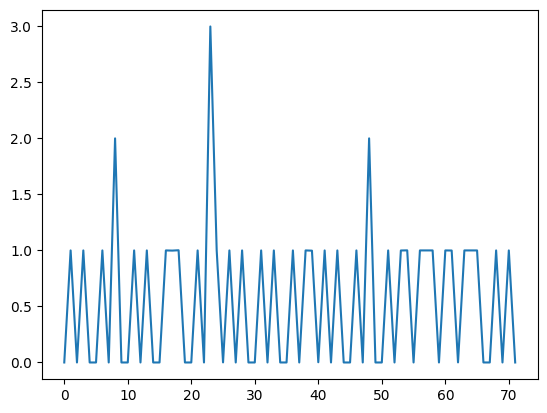

1070 :  2020-03-31 00:00:00 -> 2020-04-03 00:00:00


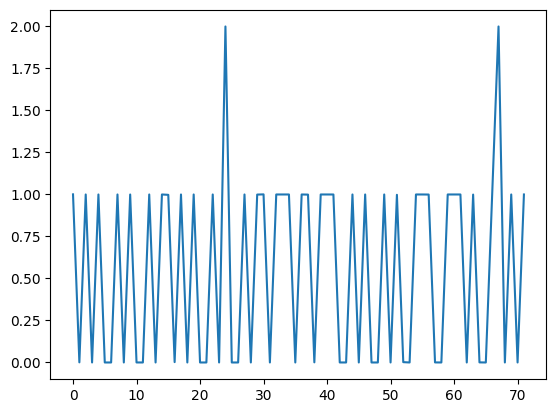

1071 :  2020-04-01 00:00:00 -> 2020-04-06 00:00:00


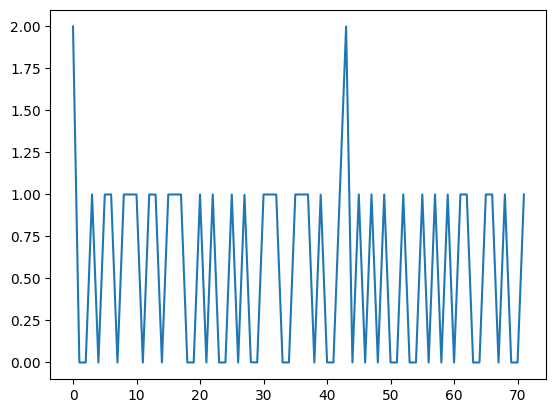

1072 :  2020-04-02 00:00:00 -> 2020-04-07 00:00:00


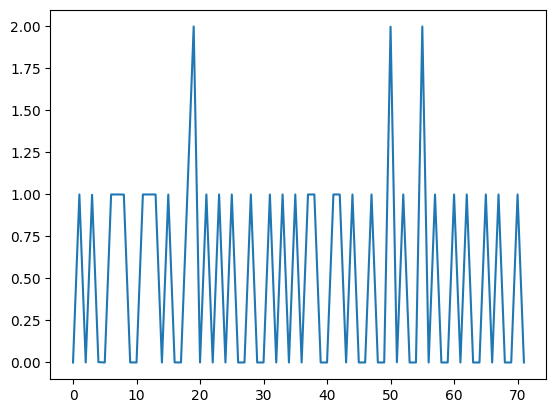

1073 :  2020-04-03 00:00:00 -> 2020-04-08 00:00:00


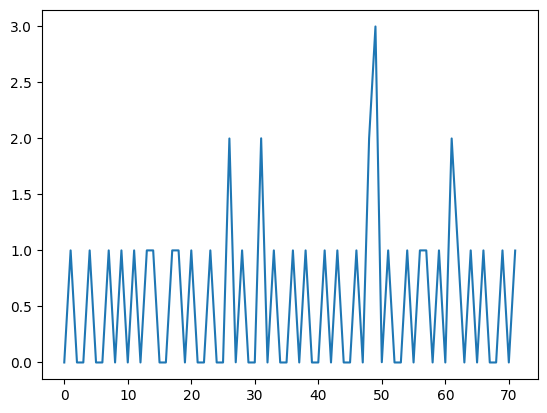

1074 :  2020-04-06 00:00:00 -> 2020-04-09 00:00:00


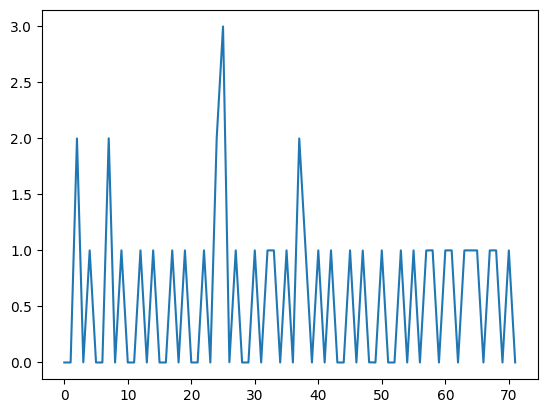

1075 :  2020-04-07 00:00:00 -> 2020-04-10 00:00:00


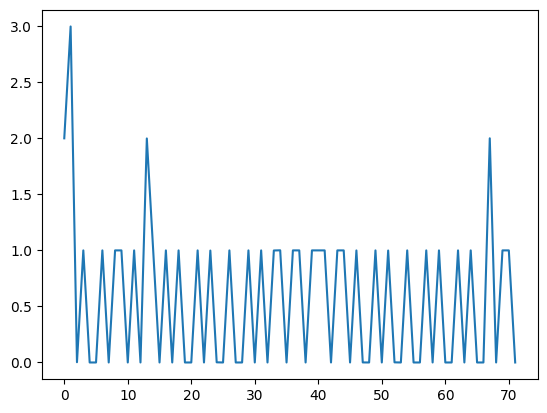

1076 :  2020-04-08 00:00:00 -> 2020-04-14 00:00:00


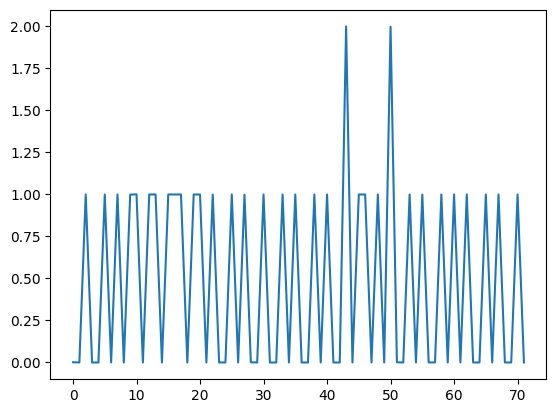

1077 :  2020-04-09 00:00:00 -> 2020-04-15 00:00:00


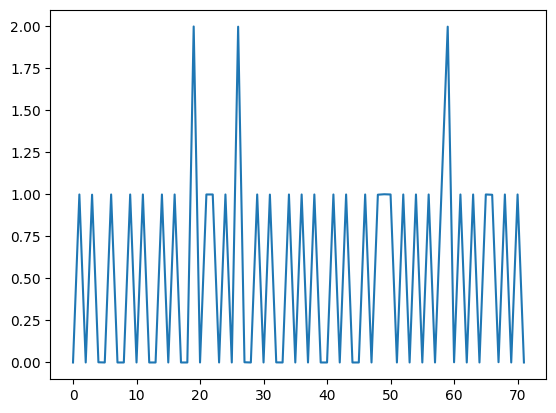

1078 :  2020-04-10 00:00:00 -> 2020-04-16 00:00:00


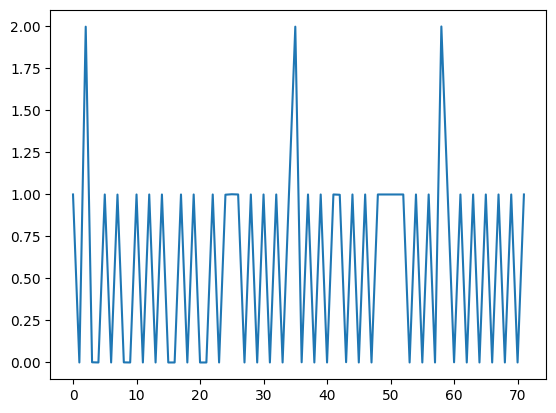

1079 :  2020-04-14 00:00:00 -> 2020-04-17 00:00:00


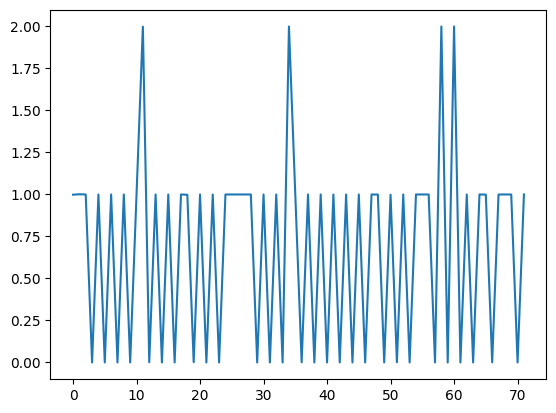

1080 :  2020-04-15 00:00:00 -> 2020-04-20 00:00:00


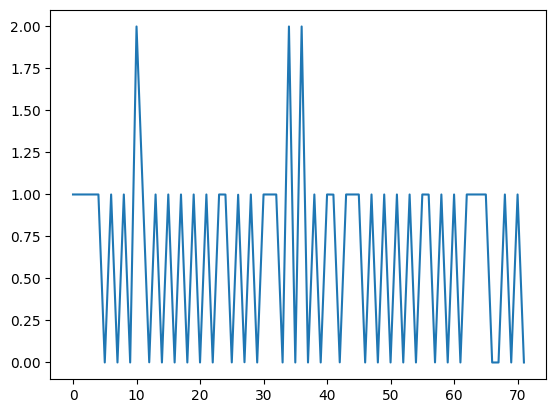

1081 :  2020-04-16 00:00:00 -> 2020-04-21 00:00:00


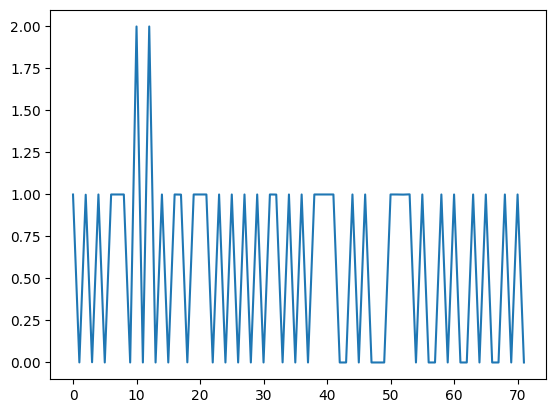

1082 :  2020-04-17 00:00:00 -> 2020-04-22 00:00:00


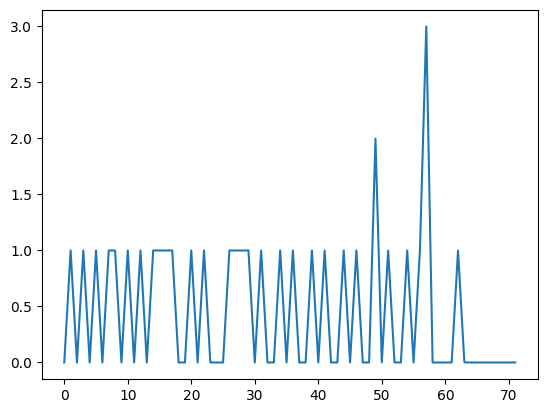

1083 :  2020-04-20 00:00:00 -> 2020-04-23 00:00:00


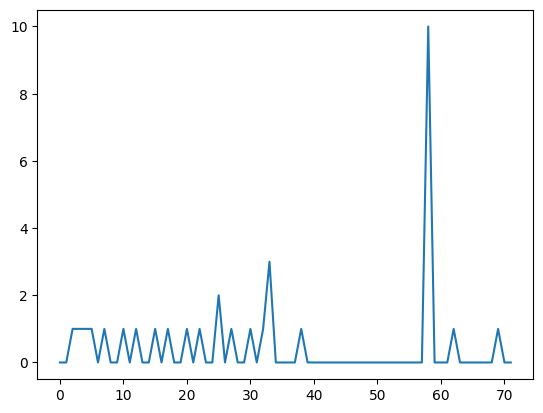

1084 :  2020-04-21 00:00:00 -> 2020-04-24 00:00:00


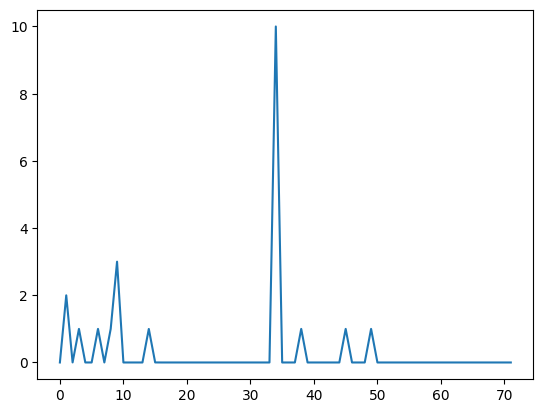

1085 :  2020-04-22 00:00:00 -> 2020-04-27 00:00:00


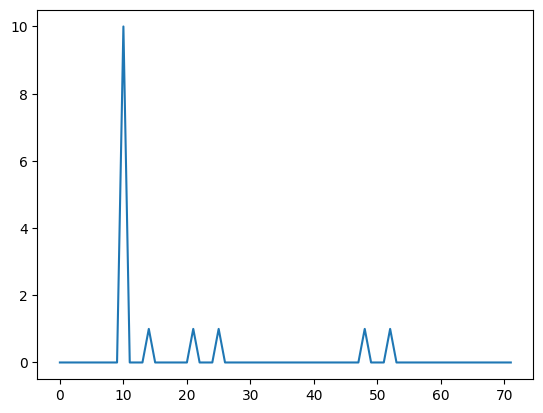

1086 :  2020-04-23 00:00:00 -> 2020-04-28 00:00:00


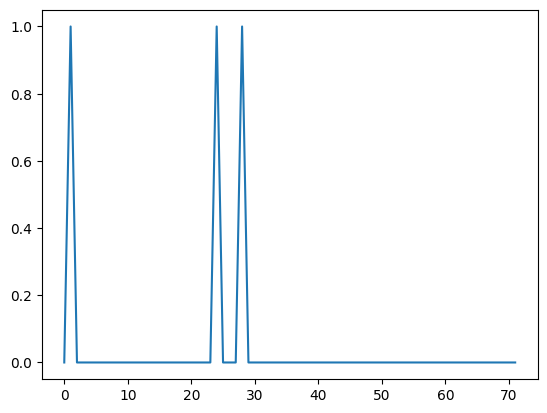

1087 :  2020-04-24 00:00:00 -> 2020-04-29 00:00:00


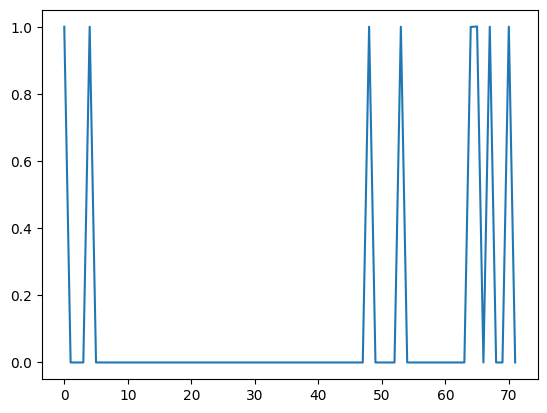

1088 :  2020-04-27 00:00:00 -> 2020-04-30 00:00:00


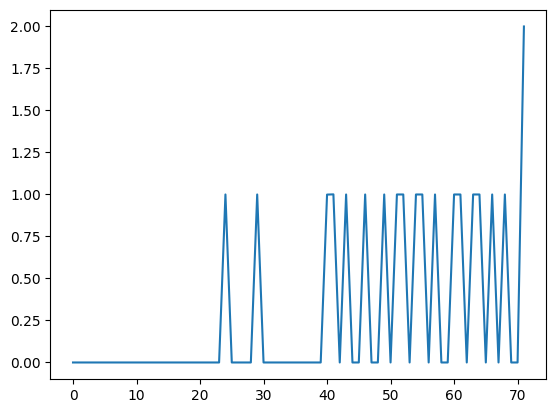

1089 :  2020-04-28 00:00:00 -> 2020-05-04 00:00:00


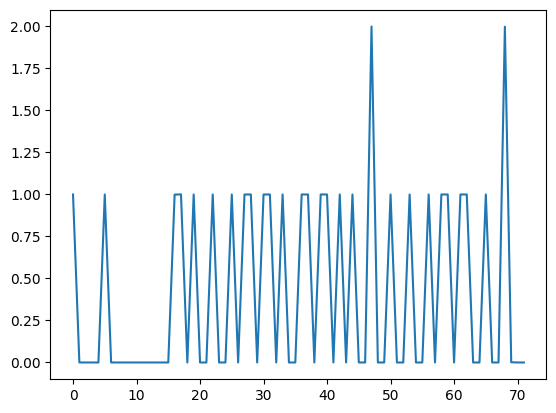

1090 :  2020-04-29 00:00:00 -> 2020-05-05 00:00:00


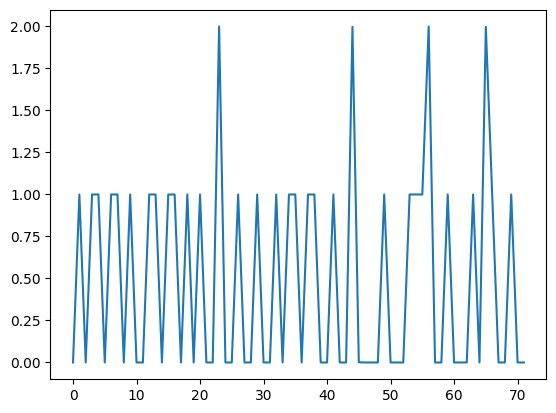

1091 :  2020-04-30 00:00:00 -> 2020-05-06 00:00:00


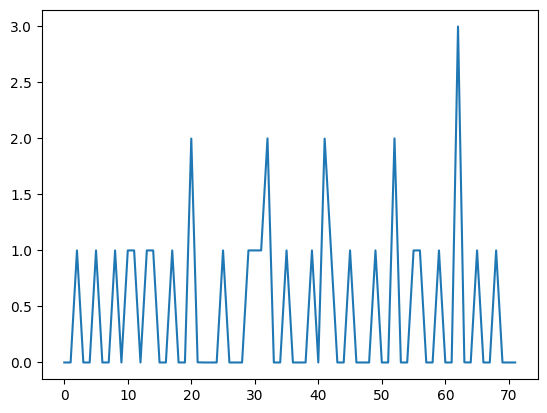

1092 :  2020-05-04 00:00:00 -> 2020-05-07 00:00:00


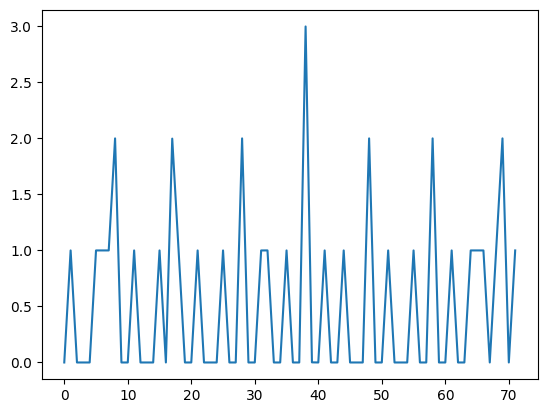

1093 :  2020-05-05 00:00:00 -> 2020-05-11 00:00:00


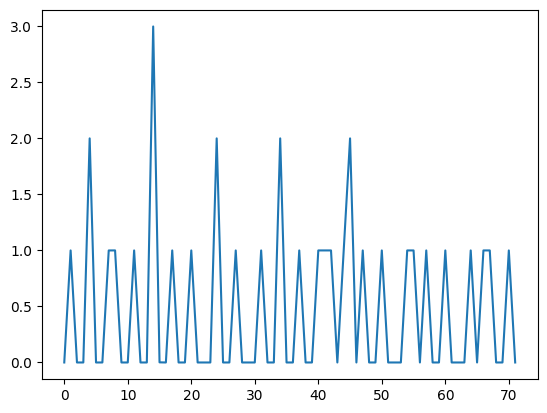

1094 :  2020-05-06 00:00:00 -> 2020-05-12 00:00:00


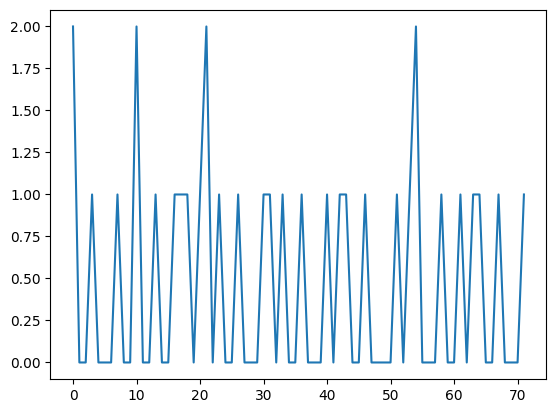

1095 :  2020-05-07 00:00:00 -> 2020-05-13 00:00:00


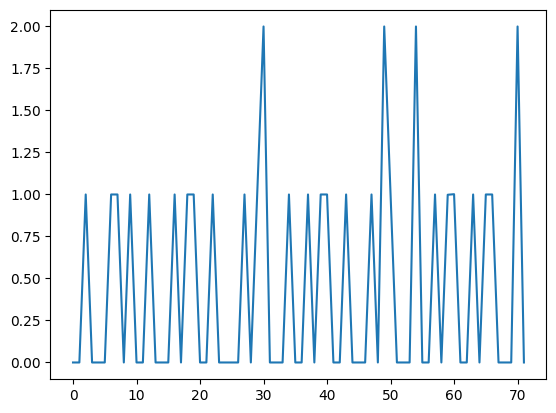

1096 :  2020-05-11 00:00:00 -> 2020-05-14 00:00:00


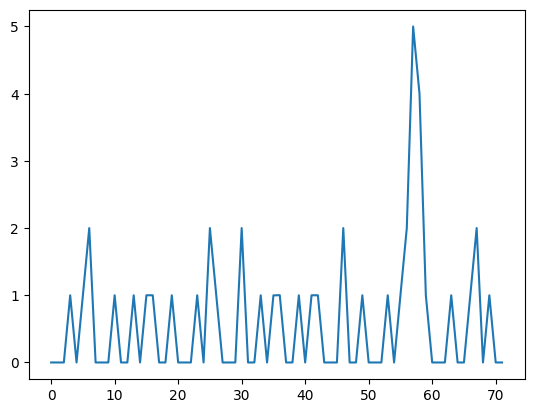

1097 :  2020-05-12 00:00:00 -> 2020-05-15 00:00:00


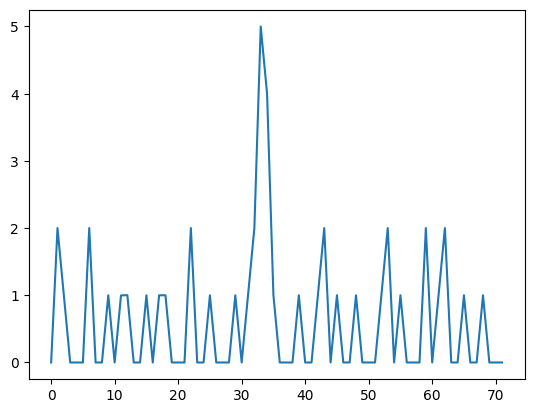

1098 :  2020-05-13 00:00:00 -> 2020-05-18 00:00:00


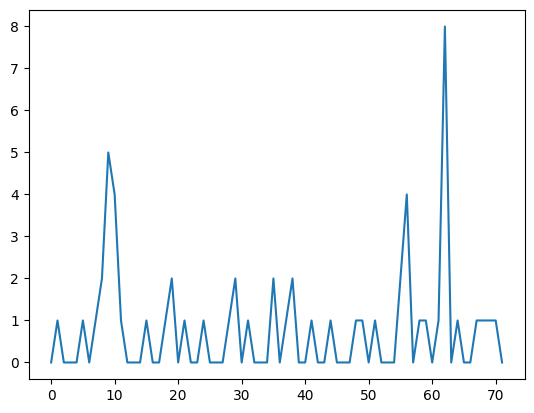

1099 :  2020-05-14 00:00:00 -> 2020-05-19 00:00:00


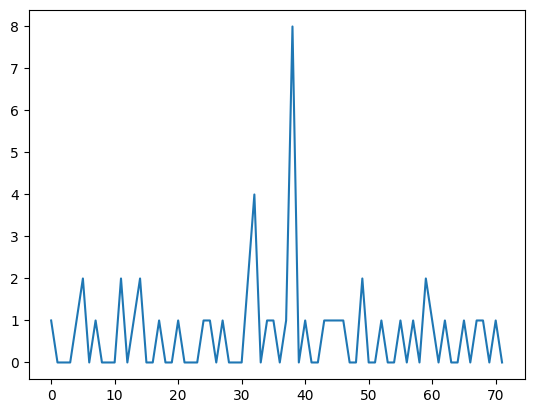

1100 :  2020-05-15 00:00:00 -> 2020-05-20 00:00:00


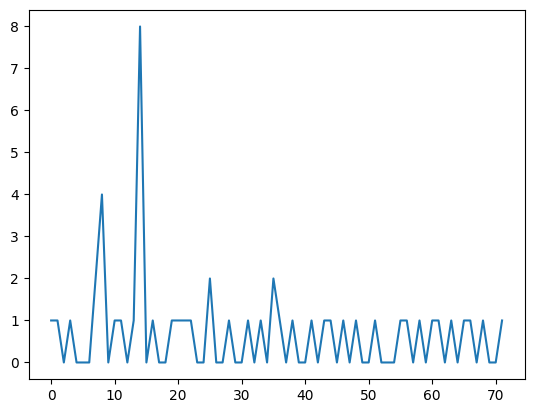

1101 :  2020-05-18 00:00:00 -> 2020-05-22 00:00:00


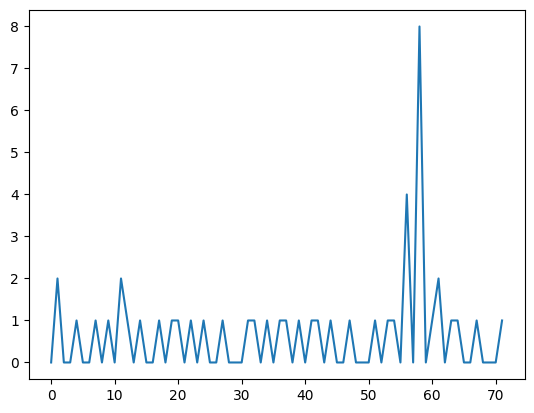

1102 :  2020-05-19 00:00:00 -> 2020-05-25 00:00:00


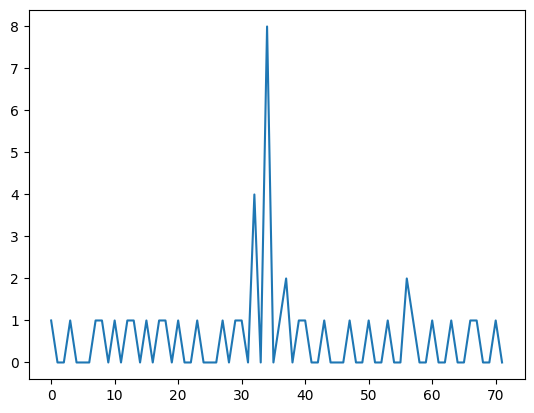

1103 :  2020-05-20 00:00:00 -> 2020-05-26 00:00:00


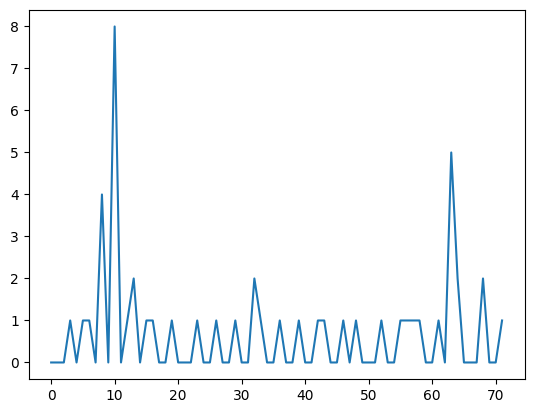

1104 :  2020-05-22 00:00:00 -> 2020-05-27 00:00:00


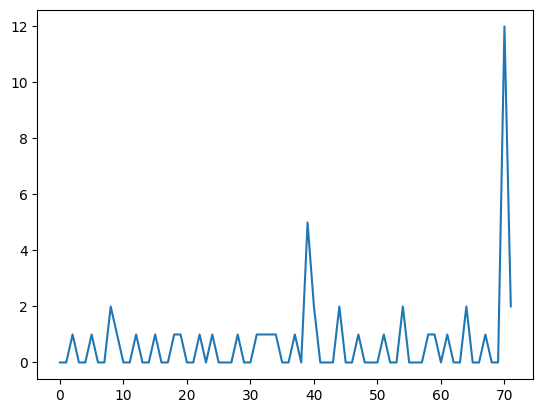

1105 :  2020-05-25 00:00:00 -> 2020-05-28 00:00:00


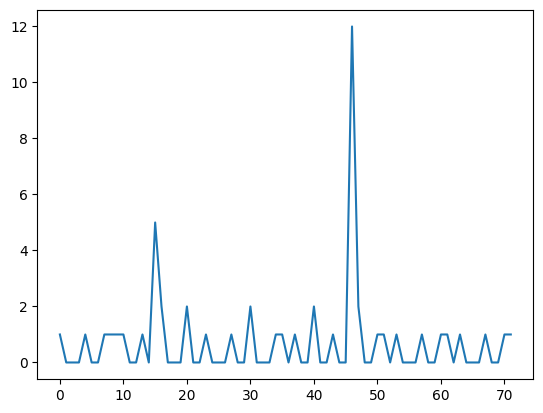

1106 :  2020-05-26 00:00:00 -> 2020-05-29 00:00:00


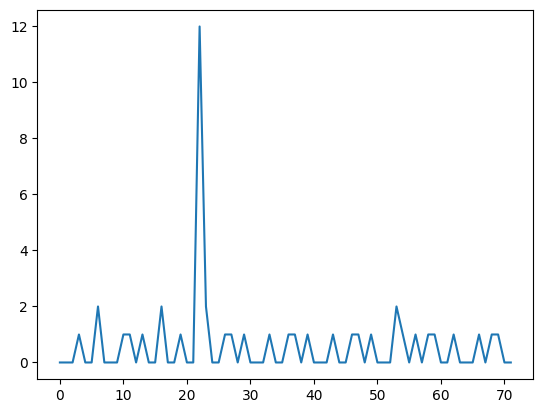

1107 :  2020-05-27 00:00:00 -> 2020-06-02 00:00:00


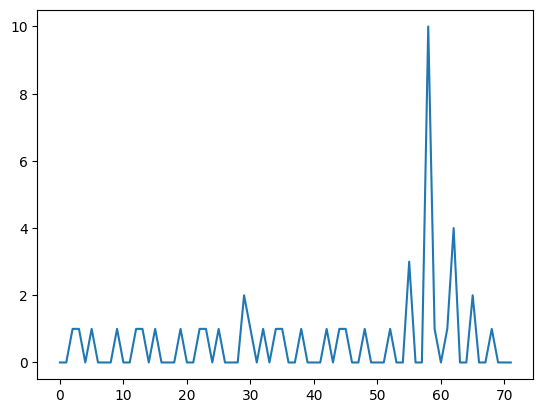

1108 :  2020-05-28 00:00:00 -> 2020-06-03 00:00:00


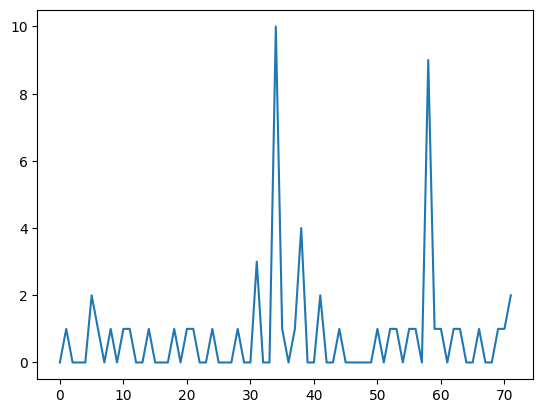

1109 :  2020-05-29 00:00:00 -> 2020-06-04 00:00:00


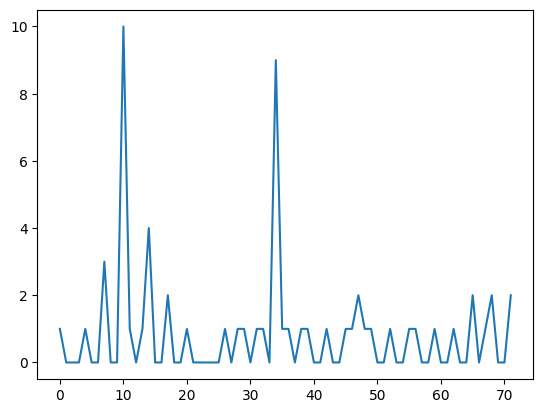

1110 :  2020-06-02 00:00:00 -> 2020-06-05 00:00:00


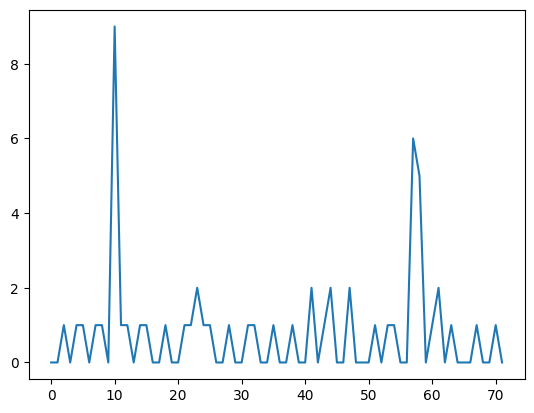

1111 :  2020-06-03 00:00:00 -> 2020-06-08 00:00:00


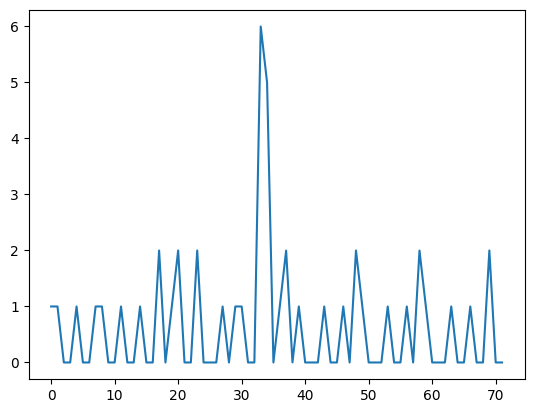

1112 :  2020-06-04 00:00:00 -> 2020-06-09 00:00:00


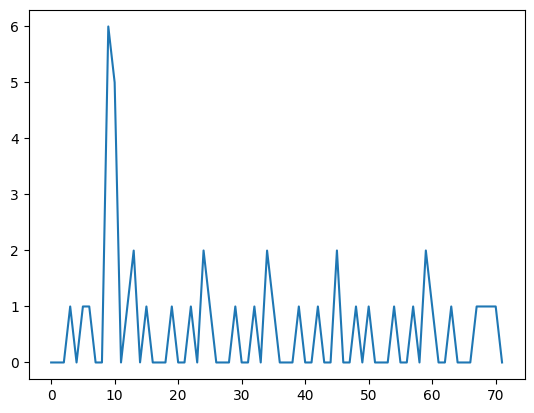

1113 :  2020-06-05 00:00:00 -> 2020-06-10 00:00:00


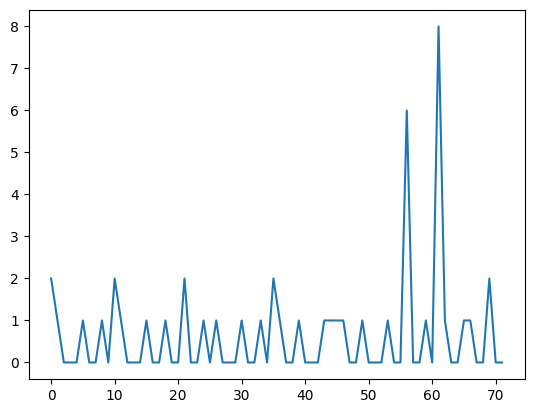

1114 :  2020-06-08 00:00:00 -> 2020-06-11 00:00:00


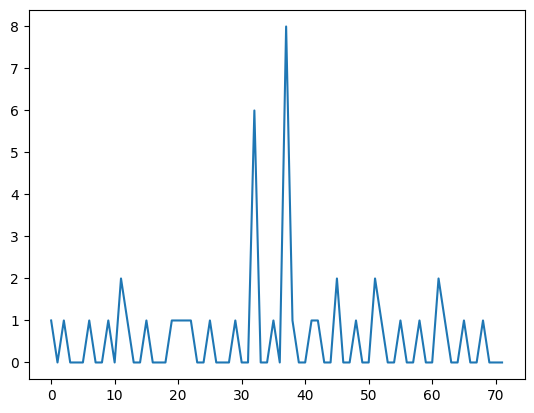

1152 :  2020-07-31 00:00:00 -> 2020-08-05 00:00:00


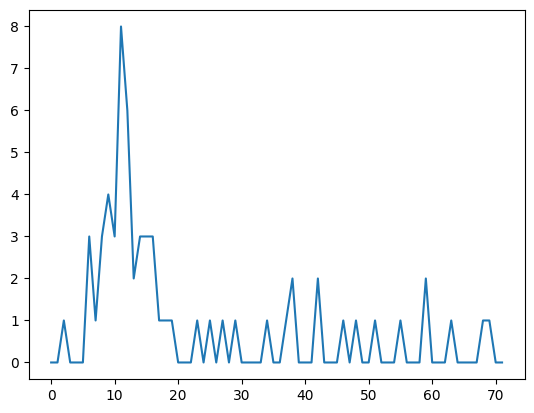

1153 :  2020-08-03 00:00:00 -> 2020-08-06 00:00:00


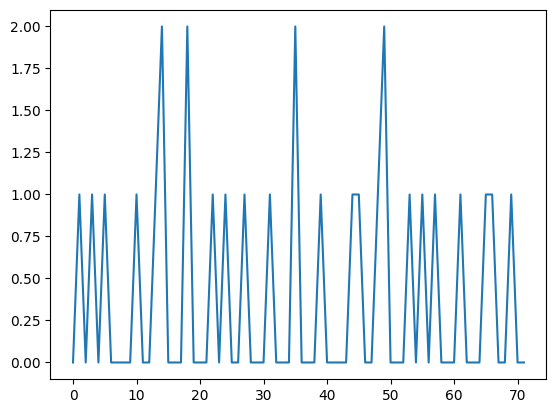

1154 :  2020-08-04 00:00:00 -> 2020-08-07 00:00:00


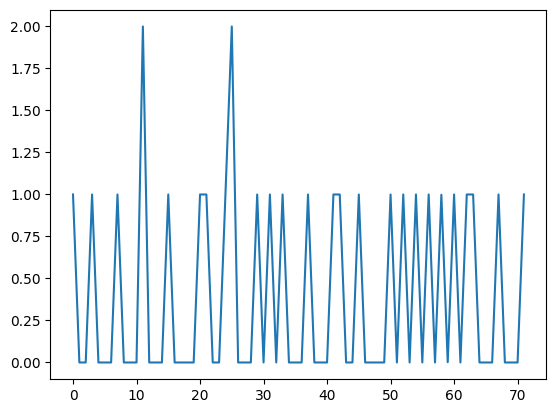

1155 :  2020-08-05 00:00:00 -> 2020-08-10 00:00:00


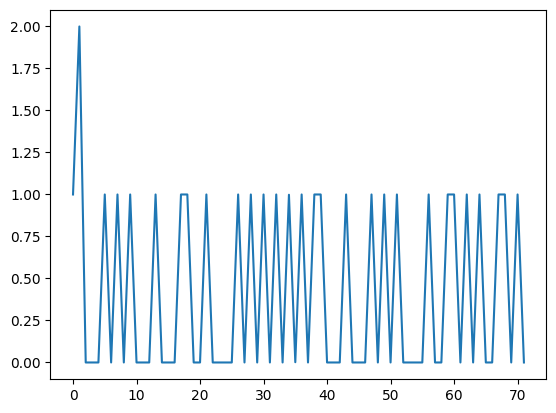

1156 :  2020-08-06 00:00:00 -> 2020-08-11 00:00:00


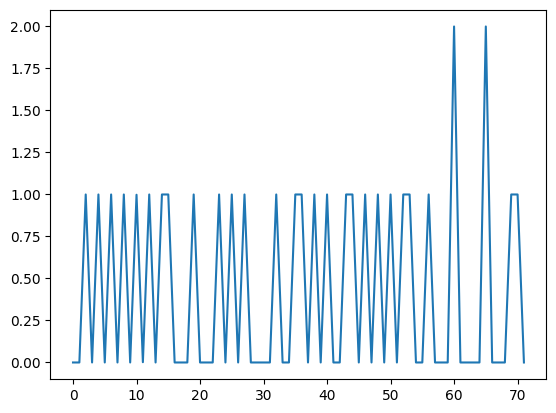

1157 :  2020-08-07 00:00:00 -> 2020-08-12 00:00:00


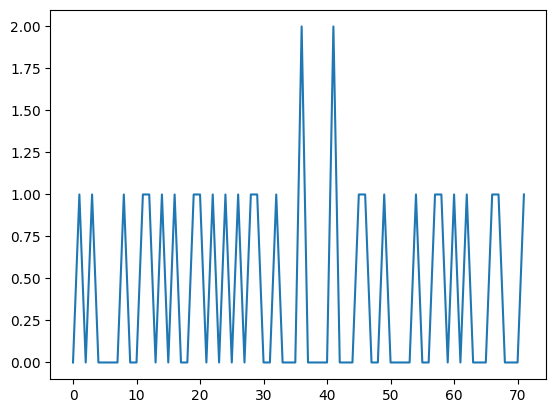

1158 :  2020-08-10 00:00:00 -> 2020-08-13 00:00:00


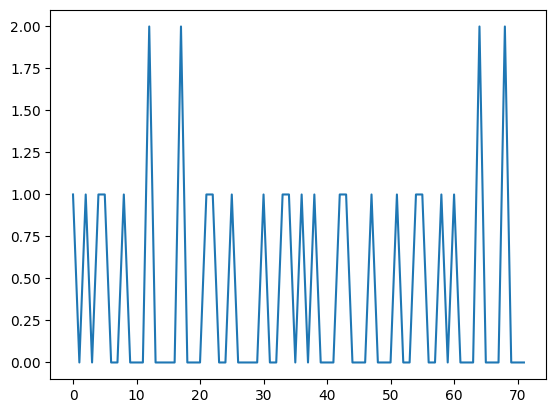

1159 :  2020-08-11 00:00:00 -> 2020-08-14 00:00:00


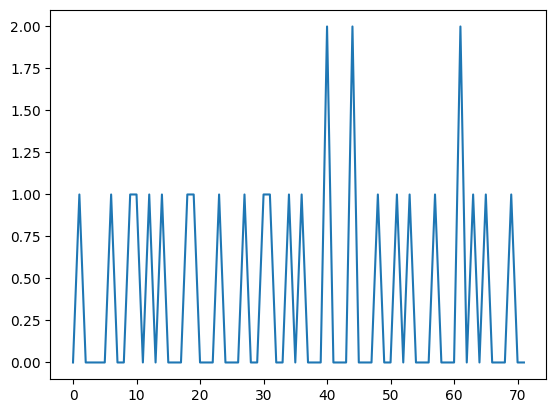

1160 :  2020-08-12 00:00:00 -> 2020-08-17 00:00:00


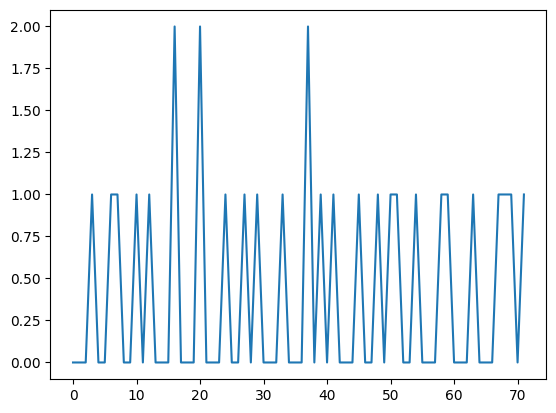

1161 :  2020-08-13 00:00:00 -> 2020-08-18 00:00:00


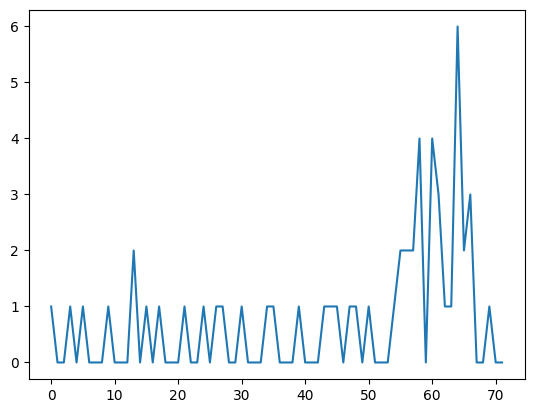

1252 :  2020-12-21 00:00:00 -> 2020-12-24 00:00:00


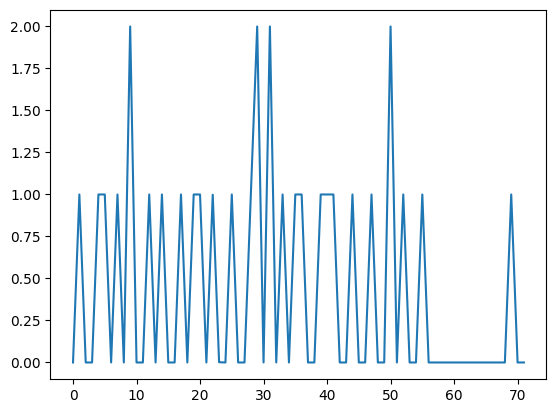

1253 :  2020-12-22 00:00:00 -> 2020-12-28 00:00:00


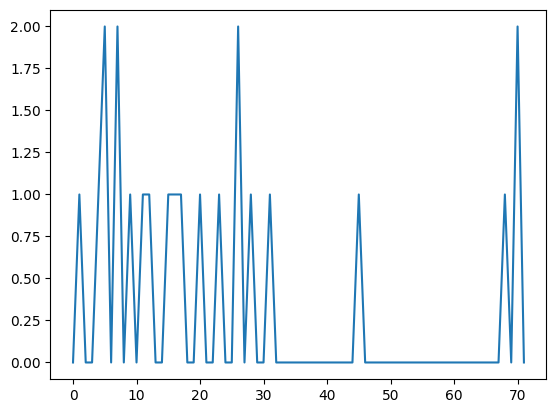

1254 :  2020-12-23 00:00:00 -> 2020-12-29 00:00:00


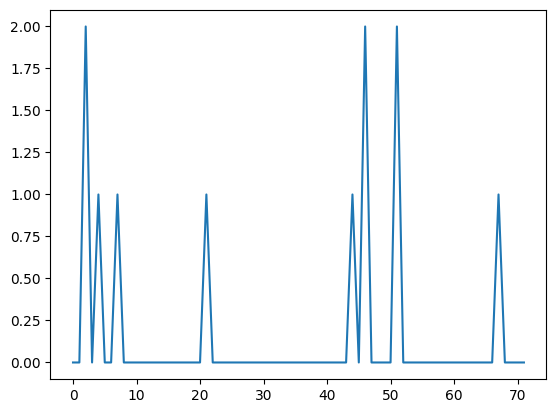

1255 :  2020-12-24 00:00:00 -> 2020-12-30 00:00:00


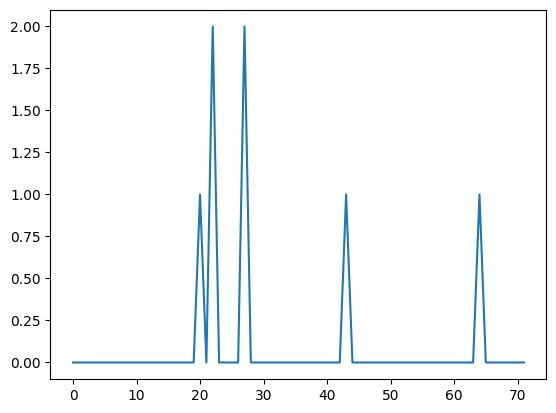

1406 :  2021-08-02 00:00:00 -> 2021-08-05 00:00:00


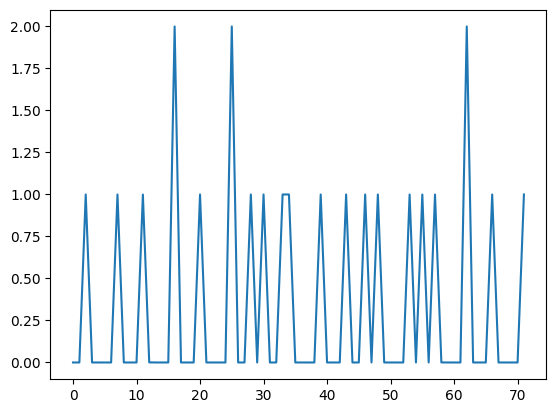

1407 :  2021-08-03 00:00:00 -> 2021-08-06 00:00:00


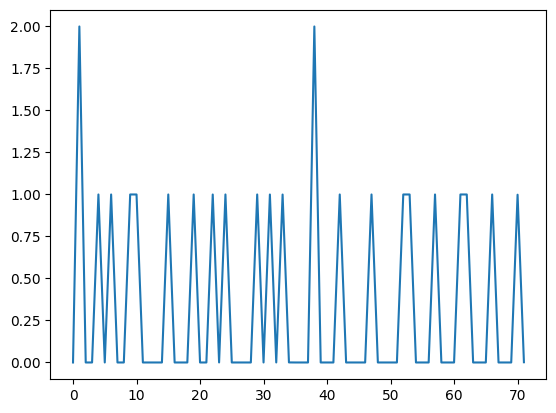

1408 :  2021-08-04 00:00:00 -> 2021-08-09 00:00:00


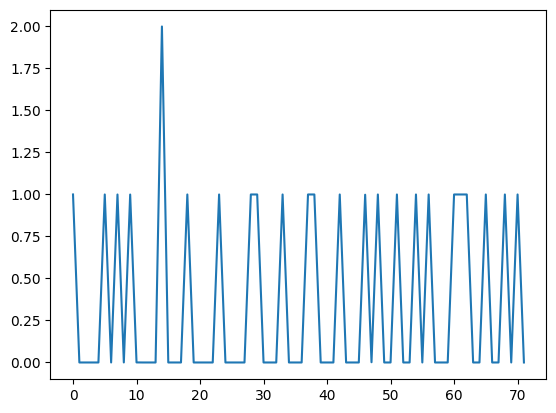

1409 :  2021-08-05 00:00:00 -> 2021-08-10 00:00:00


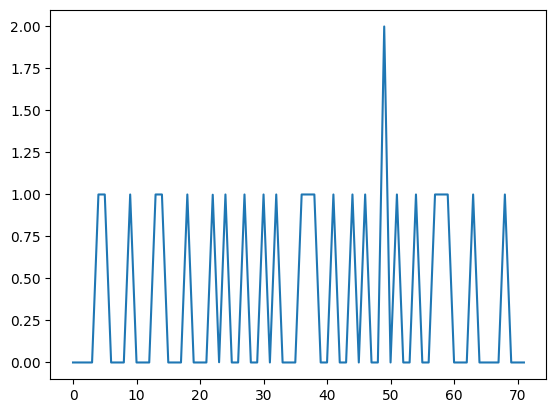

1410 :  2021-08-06 00:00:00 -> 2021-08-11 00:00:00


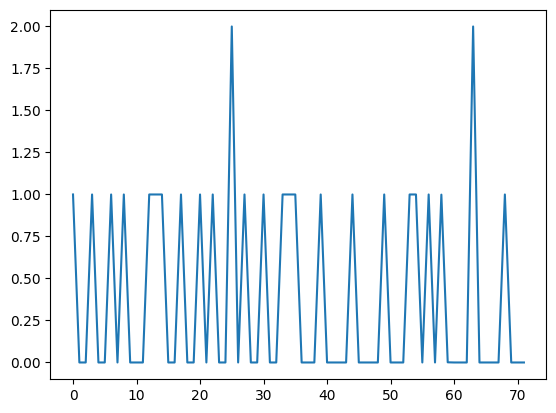

1411 :  2021-08-09 00:00:00 -> 2021-08-12 00:00:00


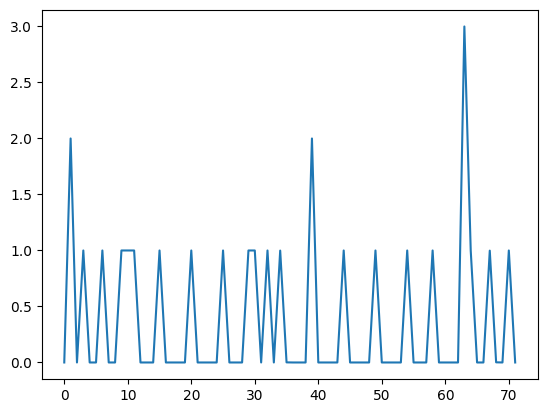

1412 :  2021-08-10 00:00:00 -> 2021-08-13 00:00:00


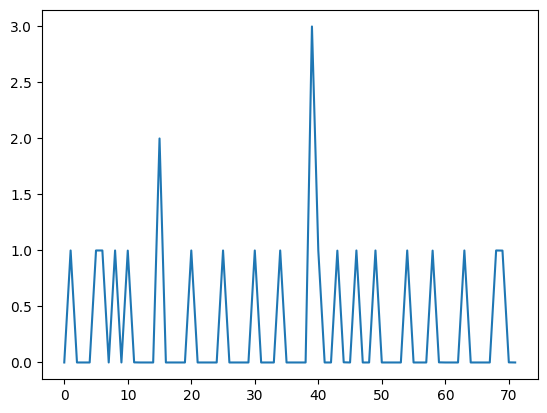

1413 :  2021-08-11 00:00:00 -> 2021-08-16 00:00:00


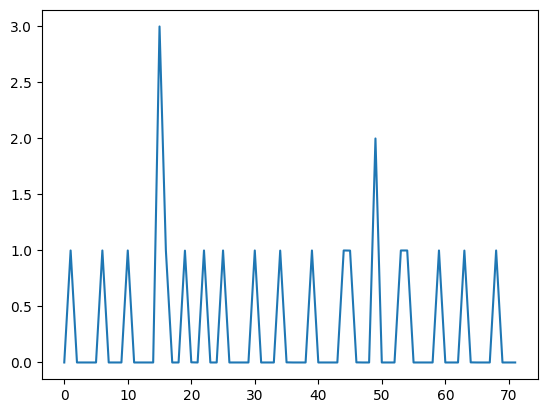

1414 :  2021-08-12 00:00:00 -> 2021-08-17 00:00:00


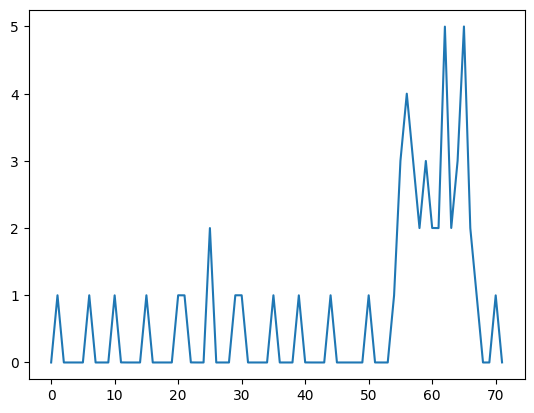

1507 :  2021-12-23 00:00:00 -> 2021-12-28 00:00:00


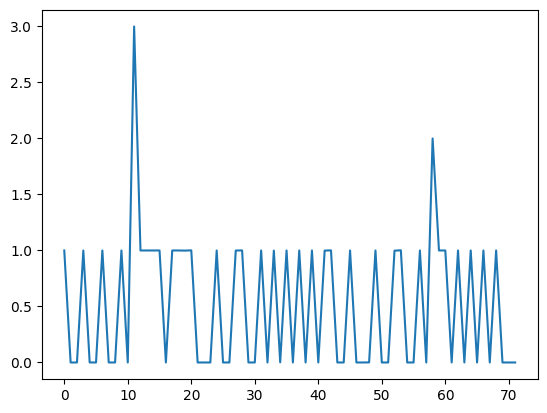

1508 :  2021-12-24 00:00:00 -> 2021-12-29 00:00:00


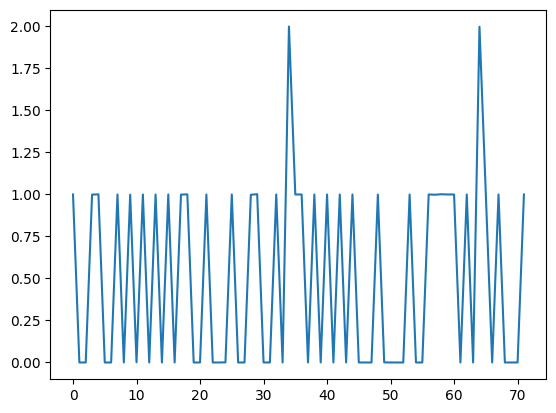

1509 :  2021-12-27 00:00:00 -> 2021-12-30 00:00:00


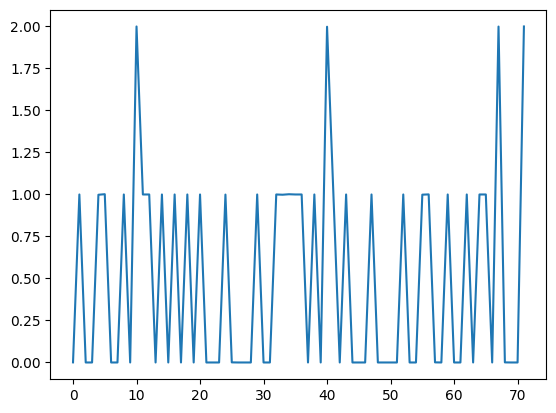

1510 :  2021-12-28 00:00:00 -> 2021-12-31 00:00:00


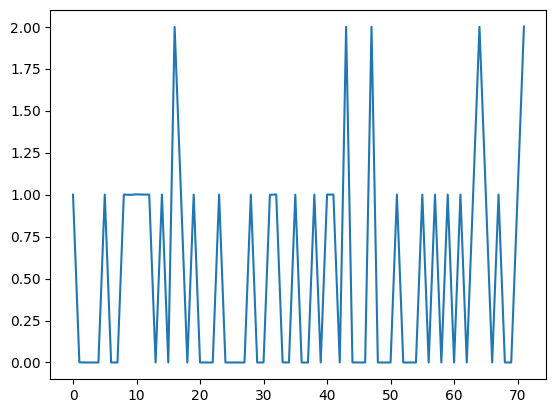

1511 :  2021-12-29 00:00:00 -> 2022-01-03 00:00:00


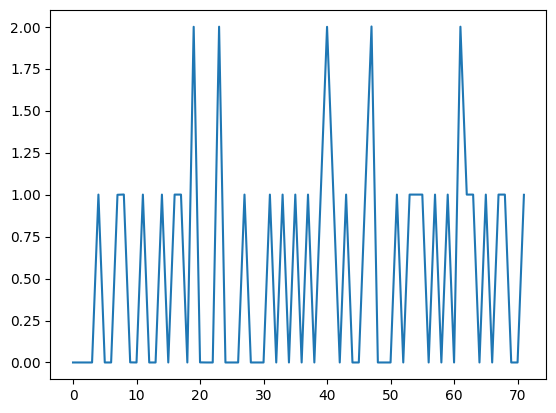

In [140]:
n_days = 3
day_size = 24

def get_feature(day0):
    sequence = []

    start = day0
    end = start + window_size

    for day in range(n_days):
        sequence.extend(load[feature_name].values[start: end])
        start += day_size#*7
        end += day_size#*7
    return sequence


data = []
for i in range(len(load)//day_size - n_days*day_size):
    # r = np.random.randint(50)
    # day0 = r*day_size
    
    day0 = i*day_size
    sequence = get_feature(day0)
    data.append(sequence)

    if i<5:
    # if np.array(sequence).mean()<0.9:
        print(i, ': ', load.index[day0], "->", load.index[day0 + day_size*n_days])
        plt.plot(sequence)
        plt.show()
        # break


# print(load.index[day0], load.index[day0 + day_size*n_days])
# plt.plot(data[-1])
# i

In [130]:
len(data)

1634

In [131]:
train_test_split_ratio  = 0.8

N = int(train_test_split_ratio*len(data))
data = np.array(data)
train_data = data[:N, :] 
test_data = data[N:, :]   
npy_data_path = "../data/inpg_dataset/npy_data"

# delete files in folder
files = glob.glob(os.path.join(npy_data_path, "filter", "*"))
for f in files:
    os.remove(f)
files = glob.glob(os.path.join(npy_data_path, "clean", "*"))
for f in files:
    os.remove(f)

# save data
for i, sample in enumerate(train_data):
    if np.isnan(sample).any(): continue
    np.save(os.path.join(npy_data_path, "filter", str(i)), sample)
    
for i, sample in enumerate(test_data):
    if np.isnan(sample).any(): continue
    np.save(os.path.join(npy_data_path, "clean", str(i)), sample)


## Synthesizing reallistic power anomalies

code from: https://github.com/KIT-IAI/pyWATTS/blob/master/pywatts/modules/generation/power_anomaly_generation_module.py

citation: Modeling and Generating Synthetic Anomalies for Energy and Power Time Series, Marian Turowski

In [42]:
data = np.array(data)

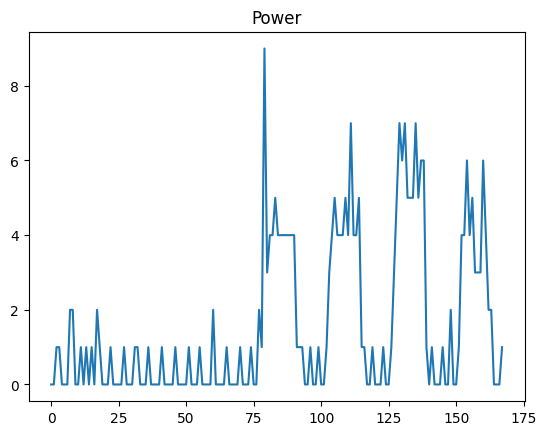

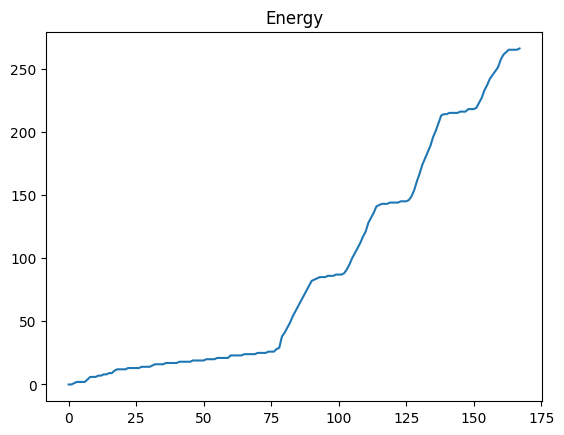

In [43]:
power = data[0]
energy = np.cumsum(power)
plt.plot(power)
plt.title("Power")
plt.show()

plt.plot(energy)
plt.title("Energy")
plt.show()

In [136]:
def _anomaly_type1(target, indices, lengths, k=0):
    """
    Anomaly type 1 that drops the power time series values to a negative value potentially followed by zero values
    before adding the missed sum of power to the end of the anomaly.
    """
    for idx, length in zip(indices, lengths):
        if length <= 2:
            raise Exception("Type 1 power anomalies must be longer than 2.")
        else:
            # WARNING: This could lead to a overflow quite fast?
            energy_at_start = target[:idx].sum() + k
            energy_at_end = target[:idx + length].sum() + k
            target[idx] = -1 * energy_at_start  # replace first by negative peak
            target[idx + 1:idx + length - 1] = 0  # set other values to zero
            target[idx + length - 1] = energy_at_end  # replace last with sum of missing values + k
    return target

def _anomaly_type2(target, indices, lengths, softstart=True):
    """
    Anomaly type 2 that drops the power time series values to potentially zero and adds the missed sum of power to
    the end of the anomaly.
    """
    for idx, length in zip(indices, lengths):
        if length <= 1:
            raise Exception("Type 2 power anomalies must be longer than 1.")
        else:
            if softstart:
                r = np.random.rand()
                energy_consumed = target[idx:idx + length].sum()
                target[idx] = r * target[idx]
                target[idx + 1:idx + length - 1] = 0
                target[idx + length - 1] = energy_consumed - target[idx]
            else:
                energy_consumed = target[idx:idx + length].sum()
                target[idx:idx + length - 1] = 0
                target[idx + length - 1] = energy_consumed
    return target

def _anomaly_type3(target, indices, lengths,
                    is_extreme=False, range_r=(0.01, 3.99), k=0):
    """
    Anomaly type 3 that creates a negatives peak in the power time series.
    """
    for idx, length in zip(indices, lengths):
        if length > 1:
            raise Exception("Type 3 power anomalies can't be longer than 1.")
        else:
            if is_extreme:
                energy_consumed = target[:idx].sum()
                target[idx] = -1 * energy_consumed - k
            else:
                r = np.random.uniform(*range_r)
                target[idx] = -1 * r * target[idx - 1]
    return target

def _anomaly_type4(target, indices, lengths, range_r=(0.01, 3.99)):
    """
    Anomaly type 4 that creates a positive peak in the power time series.
    """
    for idx, length in zip(indices, lengths):
        if length > 1:
            raise Exception("Type 4 power anomalies can't be longer than 1.")
        else:
            r = np.random.uniform(*range_r)
            target[idx] = r * target[idx - 1]
    return target


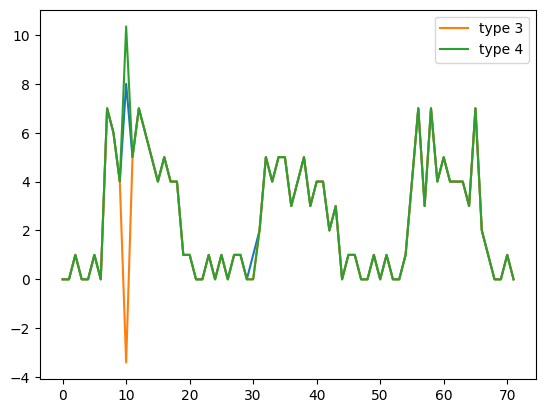

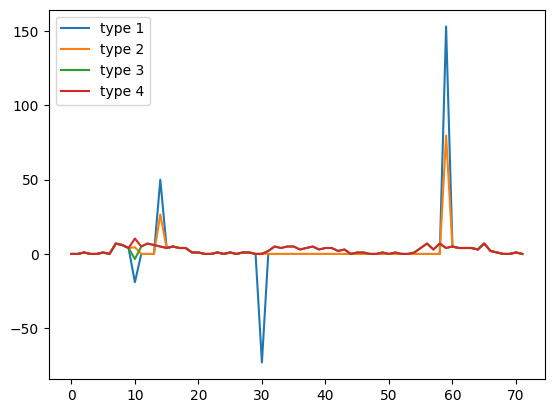

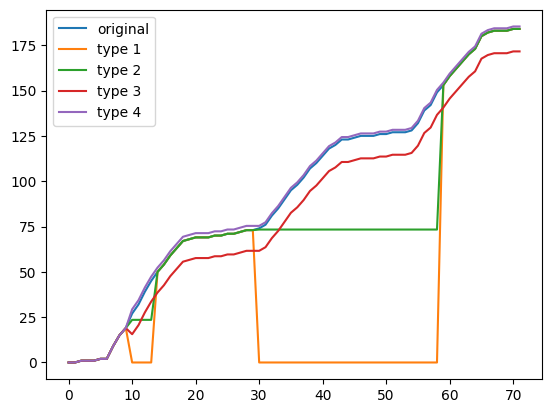

In [158]:
anomalous_power_type_1 = _anomaly_type1(power.copy(), [10, 30], [5, 30])
anomalous_power_type_2 = _anomaly_type2(power.copy(), [10, 30], [5, 30])
anomalous_power_type_3 = _anomaly_type3(power.copy(), [10, 30], [1, 1])
anomalous_power_type_4 = _anomaly_type4(power.copy(), [10, 30], [1, 1])

plt.plot(power)
# plt.plot(anomalous_power_type_1, label="type 1")
# plt.plot(anomalous_power_type_2, label="type 2")
plt.plot(anomalous_power_type_3, label="type 3")
plt.plot(anomalous_power_type_4, label="type 4")
plt.legend()
plt.show()

plt.plot(anomalous_power_type_1, label="type 1")
plt.plot(anomalous_power_type_2, label="type 2")
plt.plot(anomalous_power_type_3, label="type 3")
plt.plot(anomalous_power_type_4, label="type 4")
plt.legend()
plt.show()

energy = np.cumsum(power)
anomalous_energy_1 = np.cumsum(anomalous_power_type_1)
anomalous_energy_2 = np.cumsum(anomalous_power_type_2)
anomalous_energy_3 = np.cumsum(anomalous_power_type_3)
anomalous_energy_4 = np.cumsum(anomalous_power_type_4)
plt.plot(energy, label="original")
plt.plot(anomalous_energy_1, label="type 1")
plt.plot(anomalous_energy_2, label="type 2")
plt.plot(anomalous_energy_3, label="type 3")
plt.plot(anomalous_energy_4, label="type 4")
plt.legend()
plt.show()

change type 4 to make it more extreme?

In [245]:
def get_anom_params(anom_per_seq=3, anom_type=1, max_length=10):
    anomalous_indices = []
    anomalous_lengths = []
    start = 0
    for _ in range(anom_per_seq):
        if anom_type==1 or anom_type==2:
            length = np.random.randint(3, max_length)
            idx = np.random.randint(start, len(power) - length)
            anomalous_lengths.append(length)
            anomalous_indices.append(idx)
            start = idx + length + 1
            max_length = (len(power) - start) // ((anom_per_seq - len(anomalous_indices)) if (anom_per_seq - len(anomalous_indices)) else 1)
            print(idx, length, start, max_length)
        if anom_type==3 or anom_type==4: 
            idx = np.random.randint(start, len(power) - 1)
            anomalous_indices.append(idx)
            anomalous_lengths.append(1)
            start = idx + 2
    return sorted(anomalous_indices), sorted(anomalous_lengths)

anomalous_indices, anomalous_lengths = get_anom_params(anom_per_seq=3, anom_type=1, max_length=30)
print(anomalous_indices, anomalous_lengths)

anomalous_power_type_1 = _anomaly_type1(power.copy(), anomalous_indices, anomalous_lengths)
anomalous_power_type_2 = _anomaly_type2(power.copy(), anomalous_indices, anomalous_lengths)
# anomalous_power_type_3 = _anomaly_type3(power.copy(), anomalous_indices, anomalous_lengths)
# anomalous_power_type_4 = _anomaly_type4(power.copy(), anomalous_indices, anomalous_lengths)

plt.plot(power, label="original")
plt.plot(anomalous_power_type_1, label="type 1")
# plt.plot(anomalous_power_type_2, label="type 2")
# plt.plot(anomalous_power_type_3, label="type 3")
# plt.plot(anomalous_power_type_4, label="type 4")
plt.legend()
plt.show()

7 24 32 18
47 5 53 16
56 11 68 1
[7, 47, 56] [5, 11, 24]


IndexError: index 79 is out of bounds for axis 0 with size 72